In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [5]:
class Murray_FDM:

    a: np.ndarray
    b: np.ndarray

    def __init__(self, l, d, p, dx, dt, size):

        dl = d / (p * l**2)
        lb = (dl * dt) / dx**2
        gamma1 = 1. - 0.5 * dt + lb
        gamma2 = 1. + 0.5 * dt - lb

        a = np.zeros((size, size))
        b = np.zeros((size, size))

        a[0,0], b[0,0] = 3 / (2 * dx), -3 / (2 * dx)
        a[0,1], b[0,1] = -4 / (2 * dx), 4 / (2 * dx)
        a[0,2], b[0,2] = 1 / (2 * dx), -1 / (2 * dx)

        a[-1, -1], b[-1, -1] = -3 / (2 * dx), 3 / (2 * dx)
        a[-1, -2], b[-1, -2] = 4 / (2 * dx), -4 / (2 * dx)
        a[-1, -3], b[-1, -3] = -1 / (2 * dx), 1 / (2 * dx)

        for i in range(1, size-1):
            a[i, i], b[i,i] = gamma1, gamma2
            a[i, i+1], b[i,i+1] = -0.5 * lb, 0.5 * lb
            a[i, i-1], b[i,i-1] = -0.5 * lb, 0.5 * lb

        self.a = a
        self.b = b

    def __call__(self, x):

        dir = self.b @ x
        return np.linalg.solve(self.a, dir)

    def solve(self, ic, it = 80):

        result = np.zeros((it, len(ic)))
        result[0] = ic

        for i in tqdm(range(1, it)): result[i] = self.__call__(result[i-1])

        return result

In [6]:
# PARÂMETROS DIMENSIONAIS
l = 20
tf = 80

#PARAMETROS DO MODELO
d = 0.0139
p = 0.0553

# DISCRETIZAÇÃO DO ESPAÇO E TEMPO
space = np.linspace(0, 1, 1000)
time = np.linspace(0, tf * p, tf)

# INICIALIZAÇÃO DA CLASSE
murray = Murray_FDM(20, d, p, space[1], time[1], len(space))

In [ ]:
ic = np.exp(-100 * space**2)

result = murray.solve(ic)

100%|██████████| 79/79 [00:02<00:00, 33.71it/s]


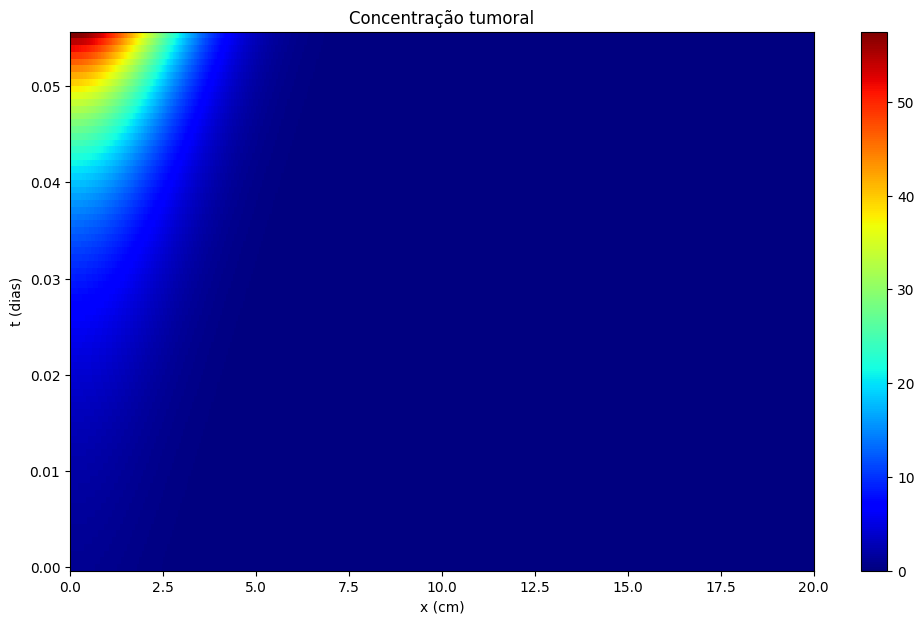

In [16]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.pcolormesh(space * l, time / tf, result.reshape(tf, 1000), cmap = 'jet')

plt.xlabel('x (cm)')
plt.ylabel('t (dias)')
plt.title('Concentração tumoral')

plt.colorbar()
plt.show()